In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import pandas as pd

# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font',family="Malgun Gothic")


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
%matplotlib inline

In [24]:
car = pd.read_csv("./car_year2.csv")
car

,price,mileage,mpg,engineSize,brand_bmw,brand_cclass,brand_focus,brand_ford,brand_hyundi,brand_merc,...,year_2017,year_2018,year_2019,year_2020,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,12500,15735,55.4,1.4,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,11000,29946,55.4,1.4,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,17300,1998,49.6,1.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,13900,32260,58.9,1.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,13250,76788,61.4,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57502,4995,65000,48.0,2.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
57503,12495,41850,58.9,2.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
57504,8950,58000,58.9,2.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
57505,2995,92640,48.0,2.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split
x = car.drop("price", axis = 1)
y = car["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=0)
x_train.shape , x_test.shape , y_train.shape, y_test.shape

((40254, 41), (17253, 41), (40254,), (17253,))

In [26]:
# 선형모델 적용시킨 결과
model = LinearRegression().fit(x_train, y_train)

print('훈련 점수: {:.4f}'.format(model.score(x_train, y_train)))
print('테스트점수:{:.4f}'.format(model.score(x_test, y_test)))

훈련 점수: 0.8276
테스트점수:0.8245


In [27]:
# model_ridge 적용시킨 결과

model_ridge = Ridge(alpha=1).fit(x_train, y_train)

print('훈련 점수: {:.4f}'.format(model_ridge.score(x_train, y_train) ))
print('테스트점수:{:.4f}'.format(model_ridge.score(x_test, y_test) ))

# 만들어진 모델을 X_test에 넣어서 pred_y(예측 y 값 도출)
y_pred = model_ridge.predict(x_test) 

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 우리가 만든 모델의 에러를 점검해본다. 
mae_pred = mean_absolute_error( y_test, y_pred)   # mae
print('릿지회귀모델의 오차: {:.4f}'.format(mae_pred))


훈련 점수: 0.7939
테스트점수:0.7922
릿지회귀모델의 오차: 2473.2395


In [28]:
# 릿지 회귀 모델을 적용시킨 결과 2 #alpha 값 조정

model_ridge_10 = Ridge(alpha=10).fit(x_train, y_train)

print('훈련 점수: {:.4f}'.format(model_ridge_10.score(x_train, y_train) ))
print('테스트점수:{:.4f}'.format(model_ridge_10.score(x_test, y_test) ))

# 만들어진 모델을 X_test에 넣어서 pred_y(예측 y 값 도출)
y_pred = model_ridge_10.predict(x_test) 

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 우리가 만든 모델의 에러를 점검해본다. 
mae_pred = mean_absolute_error( y_test, y_pred)   # mae
print('릿지회귀모델의 오차: {:.4f}'.format(mae_pred))


훈련 점수: 0.7348
테스트점수:0.7303
릿지회귀모델의 오차: 2828.7737


In [34]:
 # 릿지 회귀 모델을 적용시킨 결과 3
model_ridge_01 = Ridge(alpha=0.1).fit(x_train, y_train)

print('훈련 점수: {:.4f}'.format(model_ridge_01.score(x_train, y_train) ))
print('테스트점수:{:.4f}'.format(model_ridge_01.score(x_test, y_test) ))

# 만들어진 모델을 X_test에 넣어서 pred_y(예측 y 값 도출)
y_pred = model_ridge_01.predict(x_test) 

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 우리가 만든 모델의 에러를 점검해본다. 
mae_pred = mean_absolute_error( y_test, y_pred)   # mae
print('릿지회귀모델의 오차: {:.4f}'.format(mae_pred))


훈련 점수: 0.8276
테스트점수:0.8248
릿지회귀모델의 오차: 2230.8167


C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


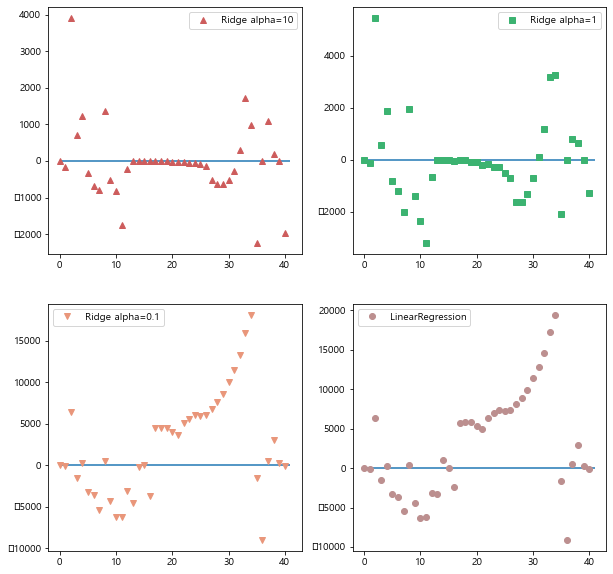

In [30]:
 # alpha값에 따른 가중치를 시각화
# α 값의 변화에 따른 가중치 (coef_)의 변화를 시각화


fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(2,2,1)
b = fig.add_subplot(2,2,2)
c = fig.add_subplot(2,2,3)
d = fig.add_subplot(2,2,4)

a.plot(model_ridge_10.coef_, '^', label='Ridge alpha=10',color= 'indianred')
b.plot(model_ridge.coef_, 's', label='Ridge alpha=1',color = 'mediumseagreen')
c.plot(model_ridge_01.coef_, 'v', label='Ridge alpha=0.1', color = 'darksalmon')
d.plot(model.coef_, 'o', label='LinearRegression',color = 'rosybrown')

a.hlines(0, 0, len(model.coef_))
b.hlines(0, 0, len(model.coef_))
c.hlines(0, 0, len(model.coef_))
d.hlines(0, 0, len(model.coef_))

a.legend()
b.legend()
c.legend()
d.legend()

# 라쏘 회귀모형

In [61]:
# 42개 특성
from sklearn.linear_model import Lasso

In [62]:
# lasso
model_lasso = Lasso().fit(x_train, y_train)

print('훈련 점수:{:.4f}'.format(model_lasso.score(x_train, y_train) ))
print('테스트 점수:{:.4f}'.format(model_lasso.score(x_test, y_test) ))
print('사용한 특성 수:', np.sum( model_lasso.coef_ != 0 ) )

훈련 점수:0.8272
테스트 점수:0.8249
사용한 특성 수: 29


In [58]:
model_lasso_001 = Lasso(alpha=0.01, max_iter=100000).fit(x_train, y_train)

print('훈련 점수:{:.4f}'.format(model_lasso_001.score(x_train, y_train) ))
print('테스트 점수:{:.4f}'.format(model_lasso_001.score(x_test, y_test) ))
print('사용한 특성 수:', np.sum( model_lasso_001.coef_ != 0 ) )

훈련 점수:0.8276
테스트 점수:0.8248
사용한 특성 수: 40


In [60]:
model_lasso_00001 = Lasso(alpha=0.0001, max_iter=1000000).fit(x_train, y_train)

print('훈련 점수:{:.4f}'.format(model_lasso_00001.score(x_train, y_train) ))
print('테스트 점수:{:.4f}'.format(model_lasso_00001.score(x_test, y_test) ))
print('사용한 특성 수:', np.sum( model_lasso_00001.coef_ != 0 ) )

훈련 점수:0.8276
테스트 점수:0.8245
사용한 특성 수: 40


# ElasticNet Regression

## 선형 회귀에 2가지 규제항 (L1, L2)을 추가한 모델
- 라쏘랑 릿지 두개 항 다 합친 것

In [46]:
from sklearn.linear_model import ElasticNet

In [47]:
ela = ElasticNet(alpha=0.01, l1_ratio = 0.5, max_iter = 100000).fit(x_train, y_train)
print('훈련세트 점수:{:.4f}'.format(ela.score(x_train, y_train)))
print('검증세트 점수:{:.4f}'.format(ela.score(x_test, y_test)))

훈련세트 점수:0.8193
검증세트 점수:0.8178


In [48]:
ela = ElasticNet(alpha=0.01, l1_ratio = 0.1, max_iter = 100000).fit(x_train, y_train)
print('훈련세트 점수:{:.4f}'.format(ela.score(x_train, y_train)))
print('검증세트 점수:{:.4f}'.format(ela.score(x_test, y_test)))

훈련세트 점수:0.8129
검증세트 점수:0.8115


In [49]:
ela = ElasticNet(alpha=0.01, l1_ratio = 0.9, max_iter = 100000).fit(x_train, y_train)
print('훈련세트 점수:{:.4f}'.format(ela.score(x_train, y_train)))
print('검증세트 점수:{:.4f}'.format(ela.score(x_test, y_test)))

훈련세트 점수:0.8262
검증세트 점수:0.8242


In [ ]:
# L1 라쏘, L2 릿지 
# l1_ratio 를 조정해보았을 때 0.5 기준 정확도 => 0.86 , 
# l1_ratio                    0.7 정확도 => 0.87 따라서 우리 데이터는 라쏘회귀모형이 성능이 더 좋다!
print('사용한 특성의 수:{}.'.format(np.sum(ela.coef_ !=0)))